In [1]:
import pandas as pd
import numpy as np
import scipy.sparse as sps
import matplotlib.pyplot as pyplot

from Evaluation.Evaluator import EvaluatorHoldout
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample
from Utils.DataReader import load_urm, load_icm, load_target
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample

In [2]:
URM_all = load_urm()

URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.85)
URM_train, URM_validation = split_train_in_two_percentage_global_sample(URM_train, train_percentage = 0.85)

evaluator_validation = EvaluatorHoldout(URM_validation, cutoff_list=[10])
evaluator_test = EvaluatorHoldout(URM_test, cutoff_list=[10])

EvaluatorHoldout: Ignoring 1488 ( 3.6%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 927 ( 2.2%) Users that have less than 1 test interactions


In [3]:
URM_all

<41629x24507 sparse matrix of type '<class 'numpy.int32'>'
	with 1554640 stored elements in Compressed Sparse Row format>

In [4]:
ICM_all = load_icm()
ICM_all

<27968x1 sparse matrix of type '<class 'numpy.int32'>'
	with 23090 stored elements in Compressed Sparse Row format>

In [5]:
profile_length = np.ediff1d(sps.csr_matrix(URM_train).indptr)
profile_length, profile_length.shape

(array([43, 15, 80, ..., 14, 39, 14], dtype=int32), (41629,))

In [6]:
block_size = int(len(profile_length)*0.05)
block_size

2081

In [7]:
sorted_users = np.argsort(profile_length)
sorted_users

array([28625, 10587, 38434, ..., 19407,  8693, 12454])

In [8]:
for group_id in range(0, 20):
    start_pos = group_id * block_size
    end_pos = min((group_id+1) * block_size, len(profile_length))

    users_in_group = sorted_users[start_pos:end_pos]

    users_in_group_p_len = profile_length[users_in_group]

    print("Group {}, #users in group {}, average p.len {:.2f}, median {}, min {}, max {}".format(
        group_id,
        users_in_group.shape[0],
        users_in_group_p_len.mean(),
        np.median(users_in_group_p_len),
        users_in_group_p_len.min(),
        users_in_group_p_len.max()))

Group 0, #users in group 2081, average p.len 8.57, median 9.0, min 2, max 10
Group 1, #users in group 2081, average p.len 11.13, median 11.0, min 10, max 12
Group 2, #users in group 2081, average p.len 12.54, median 13.0, min 12, max 13
Group 3, #users in group 2081, average p.len 13.69, median 14.0, min 13, max 14
Group 4, #users in group 2081, average p.len 14.74, median 15.0, min 14, max 15
Group 5, #users in group 2081, average p.len 15.75, median 16.0, min 15, max 16
Group 6, #users in group 2081, average p.len 16.80, median 17.0, min 16, max 17
Group 7, #users in group 2081, average p.len 17.81, median 18.0, min 17, max 18
Group 8, #users in group 2081, average p.len 18.94, median 19.0, min 18, max 20
Group 9, #users in group 2081, average p.len 20.24, median 20.0, min 20, max 21
Group 10, #users in group 2081, average p.len 21.45, median 21.0, min 21, max 22
Group 11, #users in group 2081, average p.len 22.95, median 23.0, min 22, max 24
Group 12, #users in group 2081, average p

In [9]:
from Recommenders.SLIM.SLIMElasticNetRecommender import SLIMElasticNetRecommender

recommender_class = SLIMElasticNetRecommender

import os

output_folder_path = "Experiments/"

# If directory does not exist, create
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

In [10]:
!python run_compile_all_cython.py

run_compile_all_cython: Found 10 Cython files in 4 folders...
run_compile_all_cython: All files will be compiled using your current python environment: '/opt/miniconda3/envs/tensorflow/bin/python'
Compiling [1/10]: MatrixFactorizationImpressions_Cython_Epoch.pyx... 
In file included from MatrixFactorizationImpressions_Cython_Epoch.c:746:
In file included from /opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:5:
In file included from /opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/numpy/core/include/numpy/ndarraytypes.h:1948:
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy A

3 warnings generated.
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /Users/ema/Downloads/Recommender-Systems-Challenge-2022-main/Recommenders/SLIM/Cython/Sparse_Matrix_Tree_CSR.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
Compiling [4/10]: Sparse_Matrix_Tree_CSR.pyx... PASS

Compiling [5/10]: Triangular_Matrix.pyx... 
In file included from Triangular_Matrix.c:746:
In file included from /opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:5:
In file included from /opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/numpy/core/include/numpy/ndarraytypes.h:1948:
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/numpy/core/inclu

HP3_Similarity_Cython_SGD.c:28802:21: warning: fallthrough annotation in unreachable code [-Wunreachable-code-fallthrough]
                    CYTHON_FALLTHROUGH;
                    ^
HP3_Similarity_Cython_SGD.c:341:34: note: expanded from macro 'CYTHON_FALLTHROUGH'
      #define CYTHON_FALLTHROUGH __attribute__((fallthrough))
                                 ^
HP3_Similarity_Cython_SGD.c:28813:21: warning: fallthrough annotation in unreachable code [-Wunreachable-code-fallthrough]
                    CYTHON_FALLTHROUGH;
                    ^
HP3_Similarity_Cython_SGD.c:341:34: note: expanded from macro 'CYTHON_FALLTHROUGH'
      #define CYTHON_FALLTHROUGH __attribute__((fallthrough))
                                 ^
3 warnings generated.
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /Users/ema/Downloads/Recommender-Sy

In [11]:
#here we will save MAPs of different user groups
MAP_recommender_per_group = {}

#here we will save pairs label : recommender_object
recommender_object_dict = {}

## Recommenders to try:

In [12]:
#Done
from Recommenders.NonPersonalizedRecommender import TopPop

top_pop = TopPop(URM_train)
top_pop.fit()
recommender_object_dict["TOP_POP"] = top_pop

In [13]:
#Done
from Recommenders.KNN.ItemKNNCFRecommender import ItemKNNCFRecommender

itemknn_cf = ItemKNNCFRecommender(URM_train)
itemknn_cf.fit(topK = 100, shrink = 5, similarity = 'cosine', normalize = True)
recommender_object_dict["ItemKNNCF"] = itemknn_cf

Similarity column 24507 (100.0%), 7737.08 column/sec. Elapsed time 3.17 sec


In [14]:
#Done
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommender

rp3_beta = RP3betaRecommender(URM_train)
rp3_beta.fit(topK=167, alpha=1.0, beta=0.4520495673133021, implicit=True)

RP3betaRecommender: Similarity column 24507 (100.0%), 1867.06 column/sec. Elapsed time 13.13 sec


In [15]:
#Done
from Recommenders.MatrixFactorization.PureSVDRecommender import PureSVDRecommender

pure_svd = PureSVDRecommender(URM_train)
pure_svd.fit(num_factors=31)
recommender_object_dict["PURE_SVD"] = pure_svd

PureSVDRecommender: Computing SVD decomposition...
PureSVDRecommender: Computing SVD decomposition... done in 0.65 sec


In [16]:
#Done
slim_en = SLIMElasticNetRecommender(URM_train)
slim_en.fit(topK=405, l1_ratio=0.0010299956370568744, alpha=0.01)
recommender_object_dict["SLIM_EN"] = slim_en

SLIMElasticNetRecommender: Processed 8649 (35.3%) in 5.00 min. Items per second: 28.83
SLIMElasticNetRecommender: Processed 17696 (72.2%) in 10.00 min. Items per second: 29.49
SLIMElasticNetRecommender: Processed 24507 (100.0%) in 13.58 min. Items per second: 30.09


In [17]:
#Done
from Recommenders.SLIM.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython

slim_bpr = SLIM_BPR_Cython(URM_train)
slim_bpr.fit(epochs=462, sgd_mode = "sgd", topK = 50, lambda_i = 0.0002100158148046903, lambda_j = 0.00021427617376060016, learning_rate = 0.02543769736452639)
recommender_object_dict["SLIM_BPR"] = slim_bpr

/bin/sh: free: command not found


Unable to read memory status: list index out of range
SLIM_BPR_Recommender: Automatic selection of fastest train mode. Unable to get current RAM status, you may be using a non-Linux operating system. Using dense matrix.
Processed 41629 (100.0%) in 0.90 sec. BPR loss is 4.52E-02. Sample per second: 46093
SLIM_BPR_Recommender: Epoch 1 of 462. Elapsed time 0.28 sec
Processed 41629 (100.0%) in 0.99 sec. BPR loss is 2.01E-01. Sample per second: 42241
SLIM_BPR_Recommender: Epoch 2 of 462. Elapsed time 0.37 sec
Processed 41629 (100.0%) in 1.07 sec. BPR loss is 4.05E-01. Sample per second: 38988
SLIM_BPR_Recommender: Epoch 3 of 462. Elapsed time 0.45 sec
Processed 41629 (100.0%) in 0.15 sec. BPR loss is 5.98E-01. Sample per second: 278731
SLIM_BPR_Recommender: Epoch 4 of 462. Elapsed time 0.53 sec
Processed 41629 (100.0%) in 0.26 sec. BPR loss is 7.38E-01. Sample per second: 162313
SLIM_BPR_Recommender: Epoch 5 of 462. Elapsed time 0.64 sec
Processed 41629 (100.0%) in 0.33 sec. BPR loss is 9.5

SLIM_BPR_Recommender: Epoch 55 of 462. Elapsed time 4.50 sec
Processed 41629 (100.0%) in 0.20 sec. BPR loss is 6.46E+00. Sample per second: 209658
SLIM_BPR_Recommender: Epoch 56 of 462. Elapsed time 4.58 sec
Processed 41629 (100.0%) in 0.27 sec. BPR loss is 6.61E+00. Sample per second: 152950
SLIM_BPR_Recommender: Epoch 57 of 462. Elapsed time 4.65 sec
Processed 41629 (100.0%) in 0.35 sec. BPR loss is 6.93E+00. Sample per second: 118204
SLIM_BPR_Recommender: Epoch 58 of 462. Elapsed time 4.73 sec
Processed 41629 (100.0%) in 0.43 sec. BPR loss is 6.85E+00. Sample per second: 97450
SLIM_BPR_Recommender: Epoch 59 of 462. Elapsed time 4.81 sec
Processed 41629 (100.0%) in 0.50 sec. BPR loss is 6.95E+00. Sample per second: 83113
SLIM_BPR_Recommender: Epoch 60 of 462. Elapsed time 4.88 sec
Processed 41629 (100.0%) in 0.57 sec. BPR loss is 7.14E+00. Sample per second: 72463
SLIM_BPR_Recommender: Epoch 61 of 462. Elapsed time 4.95 sec
Processed 41629 (100.0%) in 0.65 sec. BPR loss is 7.02E+00. 

SLIM_BPR_Recommender: Epoch 111 of 462. Elapsed time 9.05 sec
Processed 41629 (100.0%) in 0.81 sec. BPR loss is 9.95E+00. Sample per second: 51634
SLIM_BPR_Recommender: Epoch 112 of 462. Elapsed time 9.19 sec
Processed 41629 (100.0%) in 0.90 sec. BPR loss is 9.56E+00. Sample per second: 46026
SLIM_BPR_Recommender: Epoch 113 of 462. Elapsed time 9.28 sec
Processed 41629 (100.0%) in 1.00 sec. BPR loss is 9.52E+00. Sample per second: 41578
SLIM_BPR_Recommender: Epoch 114 of 462. Elapsed time 9.38 sec
Processed 41629 (100.0%) in 0.07 sec. BPR loss is 9.92E+00. Sample per second: 557573
SLIM_BPR_Recommender: Epoch 115 of 462. Elapsed time 9.45 sec
Processed 41629 (100.0%) in 0.15 sec. BPR loss is 9.76E+00. Sample per second: 276823
SLIM_BPR_Recommender: Epoch 116 of 462. Elapsed time 9.53 sec
Processed 41629 (100.0%) in 0.23 sec. BPR loss is 9.92E+00. Sample per second: 183827
SLIM_BPR_Recommender: Epoch 117 of 462. Elapsed time 9.61 sec
Processed 41629 (100.0%) in 0.31 sec. BPR loss is 1.0

Processed 41629 (100.0%) in 0.41 sec. BPR loss is 1.22E+01. Sample per second: 100412
SLIM_BPR_Recommender: Epoch 167 of 462. Elapsed time 13.79 sec
Processed 41629 (100.0%) in 0.49 sec. BPR loss is 1.20E+01. Sample per second: 84868
SLIM_BPR_Recommender: Epoch 168 of 462. Elapsed time 13.87 sec
Processed 41629 (100.0%) in 0.58 sec. BPR loss is 1.16E+01. Sample per second: 72208
SLIM_BPR_Recommender: Epoch 169 of 462. Elapsed time 13.96 sec
Processed 41629 (100.0%) in 0.65 sec. BPR loss is 1.21E+01. Sample per second: 63927
SLIM_BPR_Recommender: Epoch 170 of 462. Elapsed time 14.03 sec
Processed 41629 (100.0%) in 0.73 sec. BPR loss is 1.16E+01. Sample per second: 57293
SLIM_BPR_Recommender: Epoch 171 of 462. Elapsed time 14.11 sec
Processed 41629 (100.0%) in 0.80 sec. BPR loss is 1.19E+01. Sample per second: 51704
SLIM_BPR_Recommender: Epoch 172 of 462. Elapsed time 14.18 sec
Processed 41629 (100.0%) in 0.90 sec. BPR loss is 1.17E+01. Sample per second: 46466
SLIM_BPR_Recommender: Epoc

SLIM_BPR_Recommender: Epoch 222 of 462. Elapsed time 18.23 sec
Processed 41629 (100.0%) in 0.95 sec. BPR loss is 1.30E+01. Sample per second: 43876
SLIM_BPR_Recommender: Epoch 223 of 462. Elapsed time 18.33 sec
Processed 41629 (100.0%) in 1.04 sec. BPR loss is 1.29E+01. Sample per second: 40026
SLIM_BPR_Recommender: Epoch 224 of 462. Elapsed time 18.42 sec
Processed 41629 (100.0%) in 0.11 sec. BPR loss is 1.35E+01. Sample per second: 366037
SLIM_BPR_Recommender: Epoch 225 of 462. Elapsed time 18.49 sec
Processed 41629 (100.0%) in 0.19 sec. BPR loss is 1.31E+01. Sample per second: 219274
SLIM_BPR_Recommender: Epoch 226 of 462. Elapsed time 18.57 sec
Processed 41629 (100.0%) in 0.27 sec. BPR loss is 1.33E+01. Sample per second: 155031
SLIM_BPR_Recommender: Epoch 227 of 462. Elapsed time 18.65 sec
Processed 41629 (100.0%) in 0.36 sec. BPR loss is 1.34E+01. Sample per second: 115263
SLIM_BPR_Recommender: Epoch 228 of 462. Elapsed time 18.74 sec
Processed 41629 (100.0%) in 0.44 sec. BPR los

Processed 41629 (100.0%) in 0.31 sec. BPR loss is 1.43E+01. Sample per second: 134613
SLIM_BPR_Recommender: Epoch 278 of 462. Elapsed time 22.69 sec
Processed 41629 (100.0%) in 0.38 sec. BPR loss is 1.47E+01. Sample per second: 108569
SLIM_BPR_Recommender: Epoch 279 of 462. Elapsed time 22.76 sec
Processed 41629 (100.0%) in 0.48 sec. BPR loss is 1.46E+01. Sample per second: 87593
SLIM_BPR_Recommender: Epoch 280 of 462. Elapsed time 22.85 sec
Processed 41629 (100.0%) in 0.55 sec. BPR loss is 1.42E+01. Sample per second: 75795
SLIM_BPR_Recommender: Epoch 281 of 462. Elapsed time 22.93 sec
Processed 41629 (100.0%) in 0.62 sec. BPR loss is 1.45E+01. Sample per second: 66690
SLIM_BPR_Recommender: Epoch 282 of 462. Elapsed time 23.00 sec
Processed 41629 (100.0%) in 0.70 sec. BPR loss is 1.43E+01. Sample per second: 59282
SLIM_BPR_Recommender: Epoch 283 of 462. Elapsed time 23.08 sec
Processed 41629 (100.0%) in 0.79 sec. BPR loss is 1.44E+01. Sample per second: 52835
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 333 of 462. Elapsed time 27.14 sec
Processed 41629 (100.0%) in 0.83 sec. BPR loss is 1.52E+01. Sample per second: 49993
SLIM_BPR_Recommender: Epoch 334 of 462. Elapsed time 27.21 sec
Processed 41629 (100.0%) in 0.95 sec. BPR loss is 1.51E+01. Sample per second: 43738
SLIM_BPR_Recommender: Epoch 335 of 462. Elapsed time 27.33 sec
Processed 41629 (100.0%) in 1.03 sec. BPR loss is 1.51E+01. Sample per second: 40539
SLIM_BPR_Recommender: Epoch 336 of 462. Elapsed time 27.41 sec
Processed 41629 (100.0%) in 0.10 sec. BPR loss is 1.52E+01. Sample per second: 407011
SLIM_BPR_Recommender: Epoch 337 of 462. Elapsed time 27.48 sec
Processed 41629 (100.0%) in 0.18 sec. BPR loss is 1.57E+01. Sample per second: 230183
SLIM_BPR_Recommender: Epoch 338 of 462. Elapsed time 27.56 sec
Processed 41629 (100.0%) in 0.27 sec. BPR loss is 1.55E+01. Sample per second: 152161
SLIM_BPR_Recommender: Epoch 339 of 462. Elapsed time 27.65 sec
Processed 41629 (100.0%) in 0.35 sec. BPR loss

Processed 41629 (100.0%) in 0.29 sec. BPR loss is 1.65E+01. Sample per second: 143020
SLIM_BPR_Recommender: Epoch 389 of 462. Elapsed time 31.67 sec
Processed 41629 (100.0%) in 0.38 sec. BPR loss is 1.59E+01. Sample per second: 109685
SLIM_BPR_Recommender: Epoch 390 of 462. Elapsed time 31.76 sec
Processed 41629 (100.0%) in 0.45 sec. BPR loss is 1.66E+01. Sample per second: 91652
SLIM_BPR_Recommender: Epoch 391 of 462. Elapsed time 31.83 sec
Processed 41629 (100.0%) in 0.53 sec. BPR loss is 1.59E+01. Sample per second: 78532
SLIM_BPR_Recommender: Epoch 392 of 462. Elapsed time 31.91 sec
Processed 41629 (100.0%) in 0.61 sec. BPR loss is 1.63E+01. Sample per second: 68717
SLIM_BPR_Recommender: Epoch 393 of 462. Elapsed time 31.99 sec
Processed 41629 (100.0%) in 0.68 sec. BPR loss is 1.63E+01. Sample per second: 60937
SLIM_BPR_Recommender: Epoch 394 of 462. Elapsed time 32.06 sec
Processed 41629 (100.0%) in 0.76 sec. BPR loss is 1.62E+01. Sample per second: 54554
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 444 of 462. Elapsed time 36.71 sec
Processed 41629 (100.0%) in 0.41 sec. BPR loss is 1.70E+01. Sample per second: 93427
SLIM_BPR_Recommender: Epoch 445 of 462. Elapsed time 36.83 sec
Processed 41629 (100.0%) in 0.53 sec. BPR loss is 1.72E+01. Sample per second: 78371
SLIM_BPR_Recommender: Epoch 446 of 462. Elapsed time 36.91 sec
Processed 41629 (100.0%) in 0.61 sec. BPR loss is 1.68E+01. Sample per second: 65747
SLIM_BPR_Recommender: Epoch 447 of 462. Elapsed time 37.03 sec
Processed 41629 (100.0%) in 0.72 sec. BPR loss is 1.70E+01. Sample per second: 57453
SLIM_BPR_Recommender: Epoch 448 of 462. Elapsed time 37.11 sec
Processed 41629 (100.0%) in 0.80 sec. BPR loss is 1.67E+01. Sample per second: 51908
SLIM_BPR_Recommender: Epoch 449 of 462. Elapsed time 37.18 sec
Processed 41629 (100.0%) in 0.88 sec. BPR loss is 1.68E+01. Sample per second: 45469
SLIM_BPR_Recommender: Epoch 450 of 462. Elapsed time 37.30 sec
Processed 41629 (100.0%) in 1.00 sec. BPR loss is

## Plot results of models for different users groups

In [18]:
# here we perform validation over different user groups for each model
# then we plot a graph to compare them
cutoff = 10

for group_id in range(0, 20):

    start_pos = group_id*block_size
    end_pos = min((group_id+1)*block_size, len(profile_length))

    users_in_group = sorted_users[start_pos:end_pos]

    users_in_group_p_len = profile_length[users_in_group]

    print("Group {}, #users in group {}, average p.len {:.2f}, median {}, min {}, max {}".format(
        group_id,
        users_in_group.shape[0],
        users_in_group_p_len.mean(),
        np.median(users_in_group_p_len),
        users_in_group_p_len.min(),
        users_in_group_p_len.max()))


    users_not_in_group_flag = np.isin(sorted_users, users_in_group, invert=True)
    users_not_in_group = sorted_users[users_not_in_group_flag]

    evaluator_validation = EvaluatorHoldout(URM_test, cutoff_list=[cutoff], ignore_users=users_not_in_group)

    for label, recommender in recommender_object_dict.items():
        result_df, _ = evaluator_validation.evaluateRecommender(recommender)
        if label in MAP_recommender_per_group:
            MAP_recommender_per_group[label].append(result_df.loc[cutoff]["MAP"])
        else:
            MAP_recommender_per_group[label] = [result_df.loc[cutoff]["MAP"]]

Group 0, #users in group 2081, average p.len 8.57, median 9.0, min 2, max 10
EvaluatorHoldout: Ignoring 927 ( 2.2%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 1984 (100.0%) in 1.31 sec. Users per second: 1517
EvaluatorHoldout: Processed 1984 (100.0%) in 0.95 sec. Users per second: 2089
EvaluatorHoldout: Processed 1984 (100.0%) in 1.23 sec. Users per second: 1619
EvaluatorHoldout: Processed 1984 (100.0%) in 1.31 sec. Users per second: 1518
EvaluatorHoldout: Processed 1984 (100.0%) in 1.18 sec. Users per second: 1681
Group 1, #users in group 2081, average p.len 11.13, median 11.0, min 10, max 12
EvaluatorHoldout: Ignoring 927 ( 2.2%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 1978 (100.0%) in 1.34 sec. Users per second: 1474
EvaluatorHoldout: Processed 1978 (100.0%) in 0.93 sec. Users per second: 2123
EvaluatorHoldout: Processed 1978 (100.0%) in 1.36

EvaluatorHoldout: Processed 2062 (100.0%) in 1.21 sec. Users per second: 1699
Group 14, #users in group 2081, average p.len 29.26, median 29.0, min 28, max 31
EvaluatorHoldout: Ignoring 927 ( 2.2%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2069 (100.0%) in 1.40 sec. Users per second: 1476
EvaluatorHoldout: Processed 2069 (100.0%) in 1.14 sec. Users per second: 1821
EvaluatorHoldout: Processed 2069 (100.0%) in 1.26 sec. Users per second: 1641
EvaluatorHoldout: Processed 2069 (100.0%) in 1.94 sec. Users per second: 1067
EvaluatorHoldout: Processed 2069 (100.0%) in 1.12 sec. Users per second: 1844
Group 15, #users in group 2081, average p.len 32.51, median 32.0, min 31, max 34
EvaluatorHoldout: Ignoring 927 ( 2.2%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2069 (100.0%) in 1.29 sec. Users per second: 1608
EvaluatorHoldout: Processed 2069 (100.0%) in

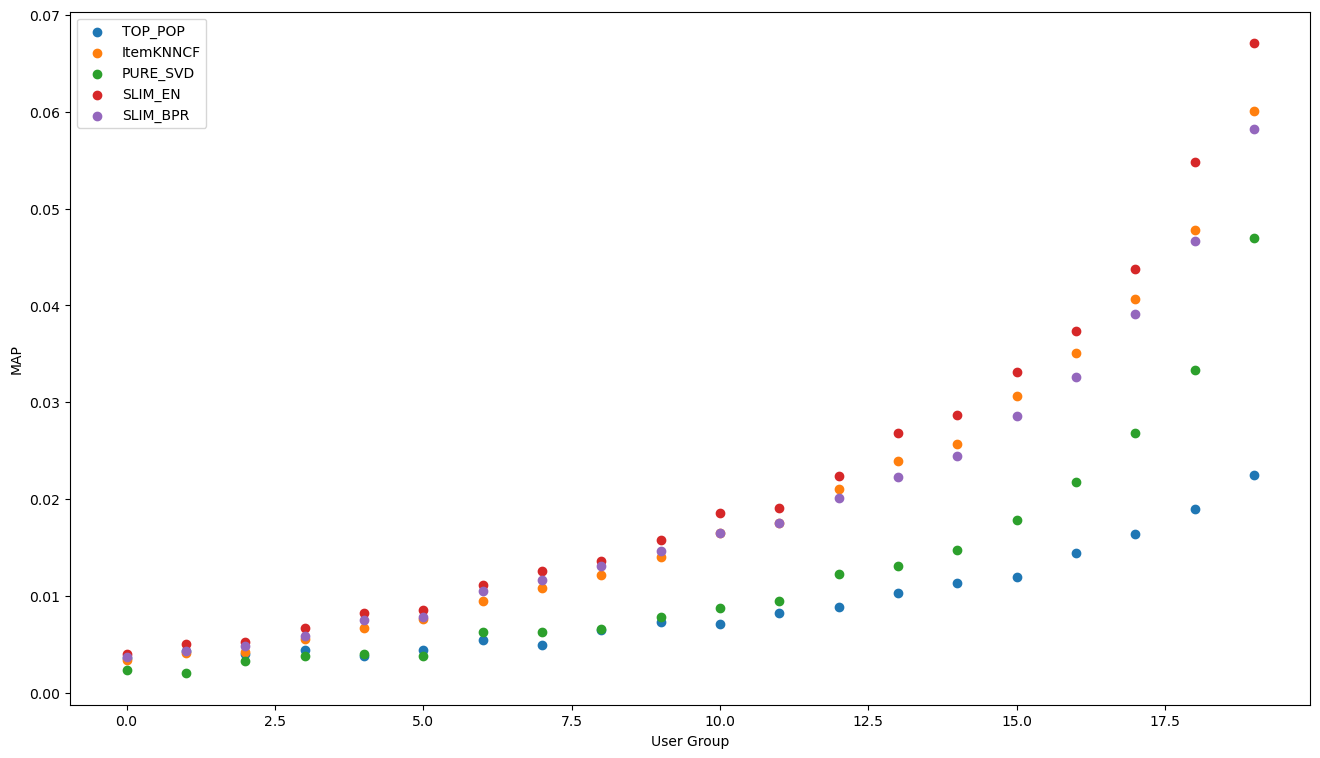

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

_ = plt.figure(figsize=(16, 9))
for label, recommender in recommender_object_dict.items():
    results = MAP_recommender_per_group[label]
    plt.scatter(x=np.arange(0,len(results)), y=results, label=label)
plt.ylabel('MAP')
plt.xlabel('User Group')
plt.legend()
plt.show()